In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
path_data_cleaned = '../data/cleaned_data.csv'
data = pd.read_csv(path_data_cleaned)
print(data.columns)

Index(['Time', 'Spot_Price', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18'],
      dtype='object')


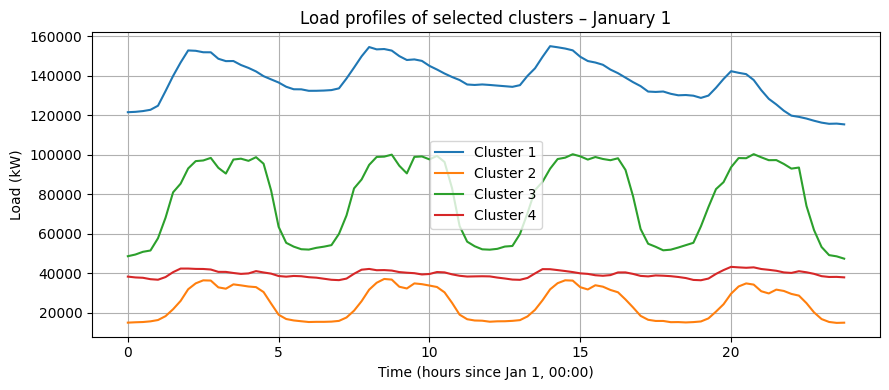

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# PARAMETERS
# =====================================================

N = 4 * 24              # 96 points = 24 hours
t_hours = np.arange(N) * 0.25  # 15 min = 0.25 hour

clusters = np.arange(1,5).astype(str) # choose any 4 clusters

# =====================================================
# PLOT
# =====================================================

plt.figure(figsize=(9, 4))

for c in clusters:
    plt.plot(
        t_hours,
        data[c].iloc[0:N],
        label=f"Cluster {c}"
    )

plt.xlabel("Time (hours since Jan 1, 00:00)")
plt.ylabel("Load (kW)")
plt.title("Load profiles of selected clusters – January 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


(array([2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.900e+01,
        7.200e+01, 1.350e+02, 2.040e+02, 3.080e+02, 5.080e+02, 7.700e+02,
        1.030e+03, 1.254e+03, 1.238e+03, 9.630e+02, 8.230e+02, 6.450e+02,
        3.810e+02, 1.680e+02, 7.000e+01, 3.000e+01, 3.400e+01, 2.000e+01,
        1.200e+01, 5.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-31.82  , -25.9846, -20.1492, -14.3138,  -8.4784,  -2.643 ,
          3.1924,   9.0278,  14.8632,  20.6986,  26.534 ,  32.3694,
         38.2048,  44.0402,  49.8756,  55.711 ,  61.5464,  67.3818,
         73.2172,  79.0526,  84.888 ,  90.7234,  96.5588, 102.3942,
        108.2296, 114.065 , 119.9004, 125.7358, 131.5712, 137.4066,
        143.242 , 149.0774, 154.9128

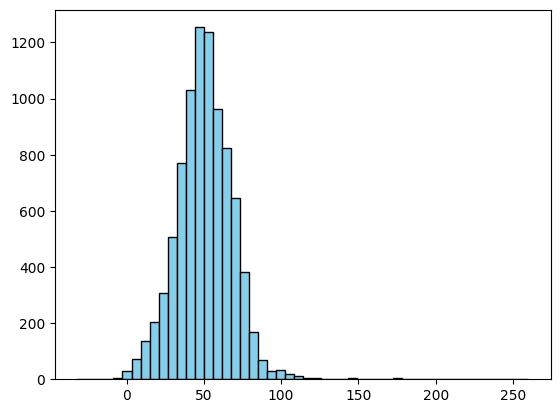

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# VaR levels
alphas = [0.90, 0.95, 0.99]
VaR_values = [data["Spot_Price"].quantile(a) for a in alphas]

plt.figure(figsize=(8, 4))
plt.hist(
    data["Spot_Price"],
    bins=50,
    color="skyblue",
    edgecolor="black",
    density=True
)

# Plot VaR lines
for a, v in zip(alphas, VaR_values):
    plt.axvline(
        v,
        linestyle="--",
        linewidth=2,
        label=f"VaR {int(a*100)}% = {v:.1f} €/MWh"
    )

plt.xlabel("Spot price (€/MWh)")
plt.ylabel("Density")
plt.title("Spot Price Distribution with VaR-based DR Thresholds")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Demand Response Model

We consider a discrete-time electricity market model indexed by
$t = 1, \dots, T$, with a constant time step $\Delta t$ (in hours).

### Notation and Data

- $P_t$ : spot electricity price at time $t$ (€/MWh)
- $L_t$ : baseline electricity load at time $t$ (MW)
- $C$ : maximum demand response capacity (MW)
- $K$ : activation price threshold (€/MWh)
- $H$ : maximum number of consecutive demand response hours
- $\rho \in [0,1]$ : rebound fraction
- $\Delta$ : rebound delay (hours)
- $\pi^{\text{cap}}$ : capacity remuneration (€/MW/year)

---

## Baseline Cost (No Demand Response)

In the absence of demand response, electricity procurement costs are given by:
$$
\text{Cost}^{\text{NO DR}} = \sum_{t=1}^{T} P_t \, L_t \, \Delta t
$$

---

## Demand Response Activation

Demand response is activated when the spot price exceeds the threshold $K$.

The activation indicator is defined as:
$$
\mathbf{1}_t = \mathbb{1}_{\{P_t \ge K\}}
$$

The effective load reduction $r_t$ is subject to both economic and technical constraints:
$$
r_t =
\begin{cases}
\min(C, L_t), & \text{if } \mathbf{1}_t = 1 \text{ and activation duration } < H, \\
0, & \text{otherwise}.
\end{cases}
$$

---

## Rebound Effect

Demand response is assumed to partially shift load rather than permanently reduce it.
A fraction $\rho$ of the curtailed load rebounds after a fixed delay $\Delta$:
$$
\text{rebound}_{t+\Delta} = \rho \, r_t.
$$

The realized electricity load is therefore:
$$
L_t^{\text{DR}} = L_t - r_t + \text{rebound}_t.
$$

---

## Economic Evaluation

The total electricity procurement cost under demand response is:
$$
\text{Cost}^{\text{DR}} = \sum_{t=1}^{T} P_t \, L_t^{\text{DR}} \, \Delta t.
$$

Energy cost savings induced by demand response are defined as:
$$
\text{Savings} = \text{Cost}^{\text{NO DR}} - \text{Cost}^{\text{DR}}.
$$

In addition, the demand response capacity receives a fixed remuneration:
$$
R^{\text{cap}} = \pi^{\text{cap}} \, C \times \frac{T \Delta t}{365 \times 24}.
$$

---

## Total Demand Response Value

The total economic value of demand response is given by:
$$
V^{\text{DR}} = \text{Savings} + R^{\text{cap}}.
$$

The model outputs the total demand response value, the associated energy savings,
and the number of activation hours.

---


In [10]:
def run_DR_model(
    data,
    K,
    C,
    H,
    rho,
    rebound_delay,
    pi_cap,
    dt=1.0,
    return_df=False
):
    """
    Runs a Demand Response (DR) model and returns economic metrics.

    Parameters
    ----------
    data : pd.DataFrame
        Must contain Spot_Price and L_baseline (in MW)
    K : float
        Spot price threshold (€/MWh)
    C : float
        DR capacity (MW)
    H : int
        Max consecutive DR hours
    rho : float
        Rebound fraction
    rebound_delay : int
        Rebound delay (hours)
    pi_cap : float
        Capacity price (€/MW/year)
    dt : float
        Time step (hours)
    return_df : bool
        If True, returns enriched DataFrame

    Returns
    -------
    dict (and optionally DataFrame)
    """

    df = data.copy()

    # -------------------------------
    # NO DR cost
    # -------------------------------
    cost_no_DR = (df["Spot_Price"] * df["L_baseline"] * dt).sum()

    # -------------------------------
    # DR activation with max duration
    # -------------------------------
    df["DR_active"] = 0
    df["r_t"] = 0.0

    consecutive_hours = 0

    for t in range(len(df)):
        price_signal = df.loc[t, "Spot_Price"] >= K

        if price_signal and consecutive_hours < H:
            df.loc[t, "DR_active"] = 1
            df.loc[t, "r_t"] = C
            consecutive_hours += 1
        else:
            df.loc[t, "DR_active"] = 0
            df.loc[t, "r_t"] = 0.0
            consecutive_hours = 0

    # Physical constraint
    df["r_t"] = np.minimum(df["r_t"], df["L_baseline"])

    # -------------------------------
    # Rebound
    # -------------------------------
    df["rebound"] = 0.0

    for t in range(len(df)):
        if df.loc[t, "r_t"] > 0:
            t_reb = t + rebound_delay
            if t_reb < len(df):
                df.loc[t_reb, "rebound"] += rho * df.loc[t, "r_t"]

    # -------------------------------
    # Realized load
    # -------------------------------
    df["L_realized"] = df["L_baseline"] - df["r_t"] + df["rebound"]

    # -------------------------------
    # WITH DR cost
    # -------------------------------
    cost_with_DR = (df["Spot_Price"] * df["L_realized"] * dt).sum()

    energy_savings = cost_no_DR - cost_with_DR

    # -------------------------------
    # Capacity revenue
    # -------------------------------
    R_cap = pi_cap * C / 365 * (len(df) * dt / 24)

    total_value = energy_savings + R_cap

    results = {
        "Energy savings (€)": energy_savings,
        "Capacity revenue (€)": R_cap,
        "Total DR value (€)": total_value,
        "DR hours": df["DR_active"].sum(),
        "Average load (MW)": df["L_baseline"].mean()
    }

    if return_df:
        return results, df
    else:
        return results


In [11]:
# =====================================================
# GLOBAL MODEL PARAMETERS
# =====================================================

# --- Demand Response rule ---
K = 150.0              # Spot price threshold (€/MWh) — used as baseline value
C = 10.0               # DR capacity (MW)
H = 3                  # Maximum consecutive DR hours

# --- Rebound effect ---
rho = 0.5              # Fraction of shed load that rebounds
rebound_delay = 2      # Delay of rebound after activation (hours)

# --- Capacity remuneration ---
pi_cap = 10000         # Capacity price (€/MW/year)

# --- Time resolution ---
dt = 1.0               # Time step in hours (1 for hourly data)


## Calibration of the Activation Threshold $K$

The activation threshold $K$ determines when demand response is triggered based on spot price levels.  
Its calibration is a key modelling choice, as it directly affects the frequency and economic value of demand response.

Demand response is not intended to operate continuously, but rather during periods of market stress.  
For this reason, $K$ is calibrated using high quantiles of the spot price distribution.

The threshold is defined as:
$$
K = \text{VaR}_{\alpha}(P_t)
$$
where $P_t$ denotes the spot price and $\alpha$ is a high confidence level.

In practice, $\alpha$ is chosen between $90\%$ and $99.5\%$, which restricts demand response activation to the upper tail of the price distribution.  
A grid of thresholds is constructed using:
$$
\alpha \in \{0.90, 0.905, \dots, 0.995\}
$$
leading to corresponding values:
$$
K(\alpha) = \text{VaR}_{\alpha}(P_t)
$$

This approach allows a systematic sensitivity analysis of demand response value with respect to activation aggressiveness.

Lower values of $K$ lead to frequent activations and higher cumulative energy savings, while higher values of $K$ restrict activation to rare price spikes, reducing energy savings and leaving capacity remuneration as the main source of value.

As a benchmark, a threshold corresponding to $\alpha = 95\%$ is retained, as it provides a reasonable trade-off between economic value and operational discipline.


In [ ]:
def calibrate_K_from_VaR(
    data,
    price_col="Spot_Price",
    alpha_min=0.90,
    alpha_max=0.995,
    alpha_step=0.005
):
    """
    Calibrate DR activation thresholds K from price VaR levels.

    Parameters
    ----------
    data : pd.DataFrame
        Must contain a column with spot prices
    price_col : str
        Name of the spot price column (€/MWh)
    alpha_min : float
        Minimum quantile level (e.g. 0.90)
    alpha_max : float
        Maximum quantile level (e.g. 0.995)
    alpha_step : float
        Step size for quantiles (e.g. 0.005)

    Returns
    -------
    pd.DataFrame
        Table with columns:
        - alpha
        - K (€/MWh)
    """

    alphas = np.arange(alpha_min, alpha_max + 1e-9, alpha_step)

    K_values = [
        data[price_col].quantile(alpha)
        for alpha in alphas
    ]

    K_table = pd.DataFrame({
        "alpha": alphas,
        "K": K_values
    })

    return K_table


K_grid = calibrate_K_from_VaR(
    data,
    price_col="Spot_Price",
    alpha_min=0.90,
    alpha_max=0.995,
    alpha_step=0.005
)

results_K = []
for K_test in K_grid['K']:
    res = run_DR_model(
        data=data,
        K=K_test,
        C=C,
        H=H,
        rho=rho,
        rebound_delay=rebound_delay,
        pi_cap=pi_cap,
        dt=dt
    )
    res["K (€/MWh)"] = K_test
    results_K.append(res)

K_sensitivity_df = pd.DataFrame(results_K)
K_sensitivity_df




,Energy savings (€),Capacity revenue (€),Total DR value (€),DR hours,Average load (MW),K (€/MWh)
0,315432.45,99726.027397,415158.477397,730,1229.378243,71.75000
1,303425.40,99726.027397,403151.427397,696,1229.378243,72.18000
2,289689.15,99726.027397,389415.177397,660,1229.378243,72.81850
3,276901.15,99726.027397,376627.177397,626,1229.378243,73.32000
4,264297.75,99726.027397,364023.777397,593,1229.378243,73.77000
5,252492.55,99726.027397,352218.577397,560,1229.378243,74.14875
6,238843.05,99726.027397,338569.077397,524,1229.378243,74.69550
7,224584.90,99726.027397,324310.927397,486,1229.378243,75.00225
8,209775.35,99726.027397,309501.377397,449,1229.378243,75.57000
9,194946.55,99726.027397,294672.577397,412,1229.378243,76.45025


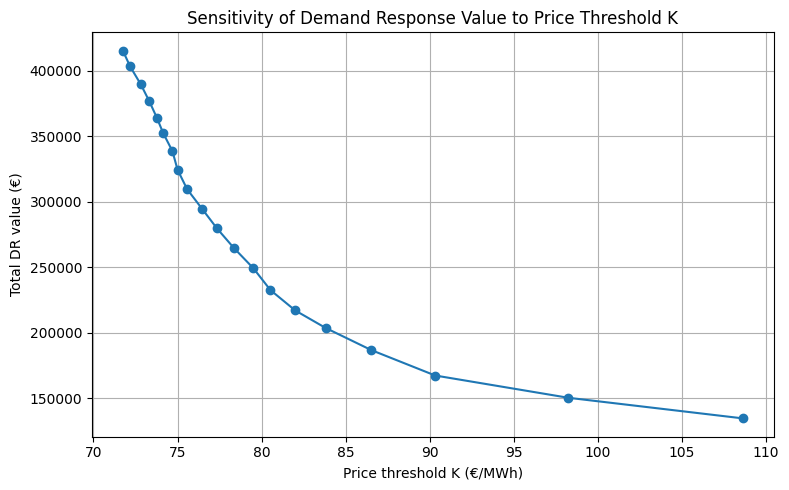

In [23]:
import matplotlib.pyplot as plt

# =====================================================
# PLOT: DR VALUE VS PRICE THRESHOLD K
# =====================================================

plt.figure(figsize=(8, 5))

plt.plot(
    K_sensitivity_df["K (€/MWh)"],
    K_sensitivity_df["Total DR value (€)"],
    marker="o"
)

plt.xlabel("Price threshold K (€/MWh)")
plt.ylabel("Total DR value (€)")
plt.title("Sensitivity of Demand Response Value to Price Threshold K")

plt.grid(True)
plt.tight_layout()
plt.show()
